In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# 1. 다중 분류

- 출력을 여러개로 만든다(여러 개 중에서 가장 높은 값을 찾기 = 원핫인코딩 = 가장높은값1, 나머지0)
- 0과 1로 표시되기에 확률로도 표시가능하겠다.(각 출력값의 합은 1) : softmax
- 확률 계산 = 전체에서 자기 비율을 나눈다
    - 소프트 맥스(SoftMax): 입력 벡터의 각 요소를 확률로 변환하는 함수
    - 각 요소의 출력값을 원 핫인코딩을 통해 [0, 1] 범위로 스케일링하고, 모든 요소의 합이 1이 되도록 확률을 나눔
    - 출력 벡터의 각 요소는 해당 클래스에 속할 확률
    - 가장 큰 확률을 가진 클래스가 최종 예측 결과로 선택
    
    
    
- 정답을 one hot encoding(변수에 쓰는거아님)    
    - 자동 : compile(..., loss="sparse_categorical_crossentropy")
    - 수동 : compile(..., loss="categorical_crossentrophy")

## 당뇨병 데이터 샘플

In [2]:
data = np.loadtxt("data/diabetes.csv", delimiter = ",")
X = data[:, 0:-1]
y = data[:, [-1]]

print(X.shape, y.shape)

(759, 8) (759, 1)


In [3]:
X.shape[1]

8

### 1) categorical_crossentropy

In [4]:
# one-hot encoding
y_one = tf.keras.utils.to_categorical(y, num_classes=2)
print(y.shape, y_one.shape)

(759, 1) (759, 2)


In [5]:
print(y[:5])
print("------")
print(y_one[:5])

[[0.]
 [1.]
 [0.]
 [1.]
 [0.]]
------
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [6]:
model = Sequential()

model.add(Flatten(input_shape=(8,)))
model.add(Dense(2, activation="softmax"))
# 은닉층에서 softmax를 쓰면 안된다 # 출력층에서만 써야한다
# 출력층에서 쓸 수 있는 activation function : 2진분류(sigmoid), 다중분류(softmax)

model.compile(loss="categorical_crossentropy", optimizer=SGD(), metrics=["accuracy"]) 
# 내가 이진분류까지 다 했을 때(수동), categorical_crossentropy
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 2)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X, y_one, epochs=100, validation_split=0.2) # 위에서 원핫인코딩으로 바꿔준 것을 꼭 넣어준다

Epoch 1/100
19/19 [==============================] - 0s 8ms/step - loss: 0.7023 - accuracy: 0.5404 - val_loss: 0.6714 - val_accuracy: 0.5855
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5848 - val_loss: 0.6472 - val_accuracy: 0.6513
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.6161 - val_loss: 0.6302 - val_accuracy: 0.6513
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.6343 - val_loss: 0.6183 - val_accuracy: 0.6645
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.6540 - val_loss: 0.6097 - val_accuracy: 0.6645
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6168 - accuracy: 0.6491 - val_loss: 0.6035 - val_accuracy: 0.6908
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.6590 - val_loss: 0.5986 - val_accuracy: 0.7105
Epoch 8/100
1

Epoch 59/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.7364 - val_loss: 0.5322 - val_accuracy: 0.7368
Epoch 60/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.7430 - val_loss: 0.5315 - val_accuracy: 0.7368
Epoch 61/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7381 - val_loss: 0.5308 - val_accuracy: 0.7368
Epoch 62/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7414 - val_loss: 0.5302 - val_accuracy: 0.7303
Epoch 63/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7414 - val_loss: 0.5295 - val_accuracy: 0.7368
Epoch 64/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.7414 - val_loss: 0.5289 - val_accuracy: 0.7368
Epoch 65/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7430 - val_loss: 0.5283 - val_accuracy: 0.7368
Epoch 

### 2) sparse_categorical_crossentropy

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(8,)))
model.add(Dense(2, activation="softmax")) # 위에서 원핫인코딩을 안했더라도 sparce_categorical_crossentropy 생각해서 2개
# 은닉층에서 softmax를 쓰면 안된다 # 출력층에서만 써야한다
# 출력층에서 쓸 수 있는 activation function : 2진분류(sigmoid), 다중분류(softmax)

model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(), metrics=["accuracy"]) 
# 원핫인코딩을 안했을 때(자동), sparse_categorical_crossentropy
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X, y, epochs=100, validation_split=0.2) # 위에서 원핫인코딩으로 바꿔준 것을 꼭 넣어준다

Epoch 1/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6882 - accuracy: 0.6260 - val_loss: 0.6690 - val_accuracy: 0.6184
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.6227 - val_loss: 0.6636 - val_accuracy: 0.6250
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6194 - val_loss: 0.6589 - val_accuracy: 0.6184
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6211 - val_loss: 0.6547 - val_accuracy: 0.6118
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6227 - val_loss: 0.6510 - val_accuracy: 0.6118
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6211 - val_loss: 0.6475 - val_accuracy: 0.6118
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.6211 - val_loss: 0.6443 - val_accuracy: 0.6184
Epoch 8/100
1

Epoch 59/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5572 - accuracy: 0.7084 - val_loss: 0.5538 - val_accuracy: 0.7237
Epoch 60/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7084 - val_loss: 0.5528 - val_accuracy: 0.7237
Epoch 61/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7100 - val_loss: 0.5518 - val_accuracy: 0.7237
Epoch 62/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5537 - accuracy: 0.7150 - val_loss: 0.5508 - val_accuracy: 0.7237
Epoch 63/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5525 - accuracy: 0.7166 - val_loss: 0.5499 - val_accuracy: 0.7237
Epoch 64/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7199 - val_loss: 0.5489 - val_accuracy: 0.7237
Epoch 65/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7232 - val_loss: 0.5480 - val_accuracy: 0.7237
Epoch 

# 2. Model 클래스

- Functional
- SubClassing

## (1) 단순 선형 회귀

In [11]:
X = [1,2,3,4,5,6]
y = [3,4,5,6,7,8]

model = tf.keras.models.Sequential()

model.add(Flatten(input_shape=(1,)))
model.add(Dense(1, activation="linear"))

model.compile(loss="mse", optimizer=SGD(learning_rate=0.01))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
#### Model() 사용

X = [1,2,3,4,5,6]
y = [3,4,5,6,7,8]

# 모델 박스가 아닌 레이어부터 만든다
input_ = Input(shape=(1,))
output_ = Dense(1, activation="linear")(input_) # 입력층을 통해서 출력층으로 나가게끔 연결

model = Model(inputs=input_, outputs=output_)

model.compile(loss="mse", optimizer=SGD(learning_rate=0.01))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## (2) 딥러닝

In [13]:
X = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] 
y = [[0], [0], [0], [1], [1], [1]]

model = tf.keras.models.Sequential()


model.add(Flatten(input_shape=(2,)))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["binary_accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 2)                 0         
                                                                 
 dense_5 (Dense)             (None, 64)                192       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [14]:
##### Model() 사용

X = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] 
y = [[0], [0], [0], [1], [1], [1]]


input_ = Input(shape=(2,))
x= Dense(64, activation="sigmoid")(input_)
x= Dense(64, activation="sigmoid")(x)
output_ = Dense(1, activation="sigmoid")(x) # 입력층과 은닉층을 통해서 꼬리에 꼬리를 물고 출력층으로 나가게끔 연결

model = Model(inputs=input_, outputs=output_)

model.compile(loss="mse", optimizer=SGD(learning_rate=0.01))
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                192       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


## (3) 복잡한 모델

입력층1(노드4개) - 은닉층1(노드8개) - 은닉층2(노드16개)

입력층2(노드8개) - 은닉층3(노드8개)

출력층(노드10개)

In [15]:
##### 입력층1에 대한 신경망 모델

input_1 = Input(shape=(4,))
hidden_1 = Dense(8, activation="relu")(input_1)
hidden_2 = Dense(16, activation="relu")(hidden_1)

output_1 = Model(inputs = input_1, outputs = hidden_2)

##### 입력층2에 대한 신경망 모델

input_2 = Input(shape=(8,))
hidden_3 = Dense(8, activation="relu")(input_2)

output_2 = Model(inputs = input_2, outputs = hidden_3)

In [16]:
##### 레이어 연결

result = concatenate([output_1.output, output_2.output])

In [17]:
##### 출력층 정의

output_ = Dense(10, activation = "softmax")(result)

In [18]:
##### 최종 모델 구축

model = Model(inputs=[output_1.input, output_2.input], outputs=output_)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 8)            40          ['input_3[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 16)           144         ['dense_11[0][0]']               
                                                                                            

# 3. 실습1 : MNIST

## (1) Version 1
- 가장 단순한 형태

In [19]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


### 2) 모델 설계 및 학습

- hidden layer : 3개
- 노드 수 : 64개

In [21]:
import tensorflow.keras.utils as utils

In [22]:
##### one-hot encoding


y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [23]:
len(y_test[0])

10

In [24]:
### 차원 변경

X_train = X_train.reshape(-1, 28*28)
# 데이터가 몇개든 (?, 28*28)의 형태가 유지되도록
X_test = X_test.reshape(-1, 784)

In [25]:
### 차원 변경   3 차원 - > 2 차원
X_train.reshape(-1, 28*28) 
X_test.reshape(-1, 784)
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [26]:
model = Sequential()

model.add(Flatten(input_shape=(28*28,))) # 여기 입력 할 때는 1차원으로 통과될 수 있도록
# model.add(Flatten(input_shape=(28**2,)))
# model.add(Flatten(input_shape=(784,)))
# model.add(Flatten(input_shape=(X.shape[1]**2,)))

model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax")) # 

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate = 0.0001), metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [27]:
result = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 3.6628 - accuracy: 0.6817
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8027 - accuracy: 0.8424
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4725 - accuracy: 0.8887
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3315 - accuracy: 0.9149
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2469 - accuracy: 0.9342
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1946 - accuracy: 0.9448
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1605 - accuracy: 0.9542
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1378 - accuracy: 0.9597
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1166 - accuracy: 0.9652
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.100

### 3) 평가

In [28]:
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 0s 1ms/step - loss: 0.2067 - accuracy: 0.9595


[0.20670010149478912, 0.9595000147819519]

### 4) 예측

In [29]:
rand_num = np.random.choice(10000, 10)
rand_num
y_test[rand_num]

# argmax = 가장 큰 값을 인덱스로 뽑아내는 것
for i in range(10):
    print(np.argmax(y_test[rand_num[i]]), end=",")

4,8,5,9,9,6,4,3,6,1,

In [30]:
y_pred = model.predict(X_test[rand_num])
y_pred # 보기가 힘들다

1/1 [==============================] - 0s 68ms/step


array([[1.3480600e-12, 8.7458742e-11, 6.5582081e-11, 3.4208395e-15,
        9.9997044e-01, 3.5827323e-08, 2.7890959e-08, 2.8621611e-05,
        5.1390852e-17, 9.9641284e-07],
       [2.5940483e-07, 2.9806596e-12, 6.7497996e-07, 2.5774989e-09,
        5.4135491e-11, 1.7353128e-09, 1.3702812e-09, 7.3797609e-13,
        9.9999905e-01, 9.5509545e-10],
       [7.2527556e-28, 5.7027341e-19, 1.2350990e-30, 1.4346402e-19,
        1.7472563e-33, 1.0000000e+00, 1.5323852e-17, 1.0283989e-31,
        7.1398400e-23, 1.2052914e-16],
       [2.3607055e-10, 2.1203498e-13, 4.0854760e-09, 1.1488319e-10,
        3.0094709e-06, 5.8702398e-09, 2.1258339e-08, 7.7323881e-09,
        2.8547613e-09, 9.9999690e-01],
       [6.7105464e-07, 1.2613826e-04, 2.3257650e-07, 3.9146529e-03,
        4.4660311e-02, 3.7084777e-02, 3.4894906e-10, 1.6004221e-04,
        9.2423131e-04, 9.1312885e-01],
       [8.6811874e-03, 2.4272870e-08, 1.6250109e-03, 2.7979062e-05,
        6.0283543e-09, 6.4390060e-03, 2.5092604e-02, 5.75

In [31]:
y_pred = model.predict(X_test[rand_num])
np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 16ms/step


array([4, 8, 5, 9, 9, 8, 4, 3, 6, 1], dtype=int64)

### (2) Version2
- validation
- 정규화

In [32]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()


##### one-hot encoding

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

### 차원 변경

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 784)

##### 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### validation : validation_data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1)

print(X_train.shape, X_val.shape)

# # 수작업으로 나누겠다(슬라이싱)
# epochs를 돌 때 계속 같은 데이터로 돌아버린다
# 최소한 시작전 한번은 섞어줘야한다.
# s = np.arange(len(X_train))
# np.random.shuffle(s)
# X_train = X_train[s]
# y_train = y_train[s]
# X_val = X_train[:10000]
# X_train = X_train[10000:]
# y_val = y_train[:10000]
# t_train = y_train[10000:]


(54000, 784) (6000, 784)


In [33]:
##### 모델 설계
model = Sequential()

model.add(Flatten(input_shape=(28*28,))) # 여기 입력 할 때는 1차원으로 통과될 수 있도록
# model.add(Flatten(input_shape=(28**2,)))
# model.add(Flatten(input_shape=(784,)))
# model.add(Flatten(input_shape=(X.shape[1]**2,)))

model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate = 0.0001), metrics=["accuracy"])

model.summary()

#### 학습
result = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


#### 평가
model.evaluate(X_test, y_test, batch_size=32)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                50240     
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1688/1688 [============================

[0.15016420185565948, 0.9678000211715698]

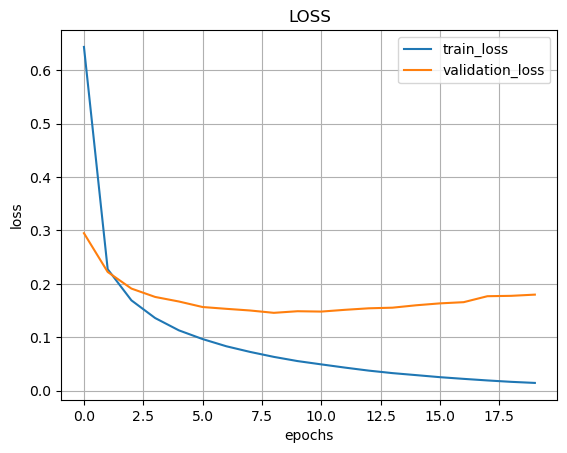

In [34]:
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정


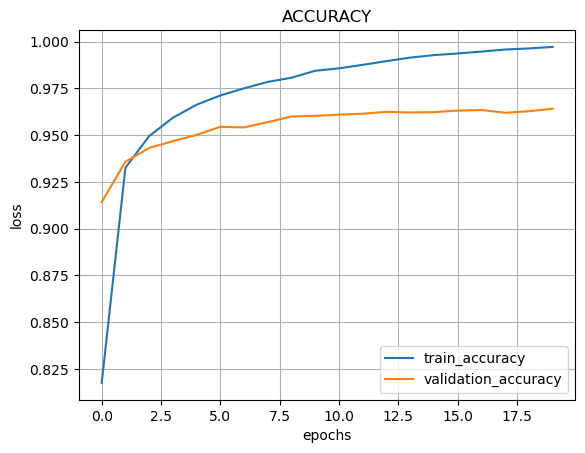

In [35]:
plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

## (3) Version3

- Tensorboard
    - 모델의 시각화
    
- https://docs.google.com/presentation/d/1KHpjyziDm0Wle-OI-6TZhWM2Oj7YiypXuZOZ1SJW8ds/edit?usp=drive_web

- 모델 저장

In [36]:
?SGD

In [37]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()


##### one-hot encoding

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

### 차원 변경

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 784)

##### 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### validation : validation_data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1)

print(X_train.shape, X_val.shape)

# # 수작업으로 나누겠다(슬라이싱)
# epochs를 돌 때 계속 같은 데이터로 돌아버린다
# 최소한 시작전 한번은 섞어줘야한다.
# s = np.arange(len(X_train))
# np.random.shuffle(s)
# X_train = X_train[s]
# y_train = y_train[s]
# X_val = X_train[:10000]
# X_train = X_train[10000:]
# y_val = y_train[:10000]
# t_train = y_train[10000:]

##### 모델 설계
model = Sequential()

model.add(Flatten(input_shape=(28*28,))) # 여기 입력 할 때는 1차원으로 통과될 수 있도록
# model.add(Flatten(input_shape=(28**2,)))
# model.add(Flatten(input_shape=(784,)))
# model.add(Flatten(input_shape=(X.shape[1]**2,)))

model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate = 0.0001), metrics=["accuracy"])

model.summary()

##### Tensor Board 설정
tf_hist = tf.keras.callbacks.TensorBoard(log_dir="./graph") # 현재위치에 graph라는 폴더를 만들어서 그곳에 저장하겠다.
#tf.keras.callbacks.TensorBoard(log_dir="graph")


#### 학습
result = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[tf_hist])


#### 평가
model.evaluate(X_test, y_test, batch_size=32)

(54000, 784) (6000, 784)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                50240     
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1688/1688 [===

[0.16114722192287445, 0.9674000144004822]

In [38]:
import os
current_directory = os.getcwd()

print(current_directory)

C:\kimhotak13\PythonWork\AI


In [39]:
##### 모델 저장

model.save("data/mnist_model.h5")

In [40]:
##### 모델 불러오기
# from tensorflow.keras.models import load_model

model2 = load_model("data/mnist_model.h5")

In [41]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 967us/step - loss: 0.1611 - accuracy: 0.9674


[0.16114722192287445, 0.9674000144004822]

In [42]:
rand_num = np.random.choice(10000, 10)
rand_num
y_test[rand_num]

# argmax = 가장 큰 값을 인덱스로 뽑아내는 것
for i in range(10):
    print(np.argmax(y_test[rand_num[i]]), end=",")

9,8,2,6,3,2,0,1,4,9,

In [43]:
y_pred2 = model2.predict(X_test[rand_num])
np.argmax(y_pred2, axis=1)

1/1 [==============================] - 0s 31ms/step


array([9, 8, 2, 6, 3, 2, 0, 1, 4, 9], dtype=int64)

### (4) Version4

- callback 종류
    - EarlyStopping
        - 모델 성능 지표가 설정한 epoch동안 개선되지 않을 때 조기 종료
        - EarlyStopping(moniter='val_loss', min_delta=0, patience=0)
            - moniter : 관찰하고자 하는 값
            - min_delta : 개선되고 있다고 판단하기 위한 최소 변화량
            - patience : 지정한 값까지 기다렸다가 종료
            
    - ModelCheckpoint
        - 모델이 학습하면서 정의한 조건을 만족했을 때, model의 weight값을 중간 지정
        - ModelCheckpoint(filepath, monitor: str = 'val_loss', save_best_only : bool = False)
            - save_best_only = True : 가장 성적이 좋을 때 파일로 저장

    - ReduceLRnPlateau
        - 모델의 성능 개선이 없을 경우, 학습률(Learning Rate)을 조절해 모델의 개선을 유도함.
        - ReducePlateau(monitor='val_loss', factor=0.1, patience=10)
            - factor : 0.5로 했을 경우 learning_rate를 절반 수준으로 조절

In [44]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()


##### one-hot encoding

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

### 차원 변경

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 784)

##### 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### validation : validation_data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1)

print(X_train.shape, X_val.shape)

##### 모델 설계
model = Sequential()

model.add(Flatten(input_shape=(28*28,))) # 여기 입력 할 때는 1차원으로 통과될 수 있도록


model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate = 0.0001), metrics=["accuracy"])

model.summary()

##### Tensor Board 설정
tf_hist = tf.keras.callbacks.TensorBoard(log_dir="./graph") # 현재위치에 graph라는 폴더를 만들어서 그곳에 저장하겠다.

##### EarlyStopping
#tf_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

##### ModelChekckpoint
tf_chk = tf.keras.callbacks.ModelCheckpoint("data/modelchk_test.h5", monitor="val_loss", save_best_only=True)

##### ReduceLROnPlateau
tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)


#### 학습 # callbacks 넣고 빼고 주의
result = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[tf_hist,
                                                                                                          tf_chk, tf_reduce])


#### 평가
model.evaluate(X_test, y_test, batch_size=32)

(54000, 784) (6000, 784)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dense_30 (Dense)            (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1688/1688 [===

Epoch 45/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0041 - accuracy: 0.9998 - val_loss: 0.1421 - val_accuracy: 0.9700 - lr: 1.5625e-06
Epoch 46/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0041 - accuracy: 0.9998 - val_loss: 0.1422 - val_accuracy: 0.9703 - lr: 1.5625e-06
Epoch 47/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0041 - accuracy: 0.9998 - val_loss: 0.1424 - val_accuracy: 0.9700 - lr: 1.5625e-06
Epoch 48/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0040 - accuracy: 0.9998 - val_loss: 0.1424 - val_accuracy: 0.9700 - lr: 7.8125e-07
Epoch 49/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0040 - accuracy: 0.9998 - val_loss: 0.1424 - val_accuracy: 0.9702 - lr: 7.8125e-07
Epoch 50/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.9681


[0.18279288709163666, 0.9681000113487244]

## (5) Verison5

- 가중치 초기화
- Dropout 
    - 훈련할때만 잠깐 Drop하고 테스트에서는 원상복구

In [45]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()


##### one-hot encoding

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

### 차원 변경

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 784)

##### 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### validation : validation_data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1)

print(X_train.shape, X_val.shape)

##### 모델 설계
model = Sequential()

model.add(Flatten(input_shape=(28*28,))) # 여기 입력 할 때는 1차원으로 통과될 수 있도록

model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate = 0.001),
              metrics=["accuracy"])

model.summary()

##### Tensor Board 설정
#tf_hist = tf.keras.callbacks.TensorBoard(log_dir="./graph") # 현재위치에 graph라는 폴더를 만들어서 그곳에 저장하겠다.

##### EarlyStopping
tf_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

##### ModelChekckpoint
#tf_chk = tf.keras.callbacks.ModelCheckpoint("data/modelchk_test.h5", monitor="val_loss", save_best_only=True)

##### ReduceLROnPlateau
#tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)


#### 학습 # callbacks 넣고 빼고 주의
result = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[tf_stop])


#### 평가
model.evaluate(X_test, y_test, batch_size=32)

(54000, 784) (6000, 784)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         

[0.17540906369686127, 0.974399983882904]

In [46]:
####

##### 가중치 초기화


##### Drop out #과적합이 많이 해소되었다.
# loss: 0.0954 - accuracy: 0.9811 - val_loss: 0.1403 - val_accuracy: 0.9762

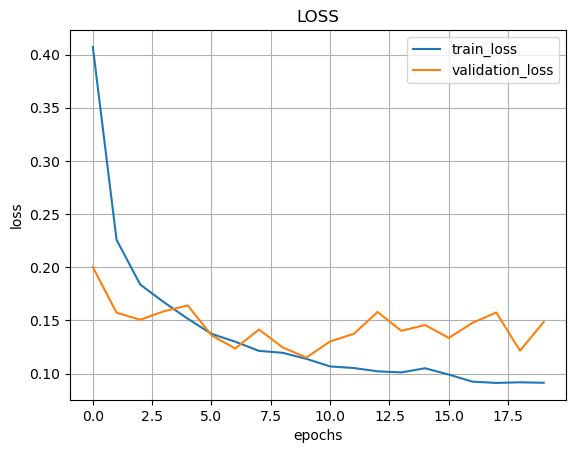

In [47]:
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

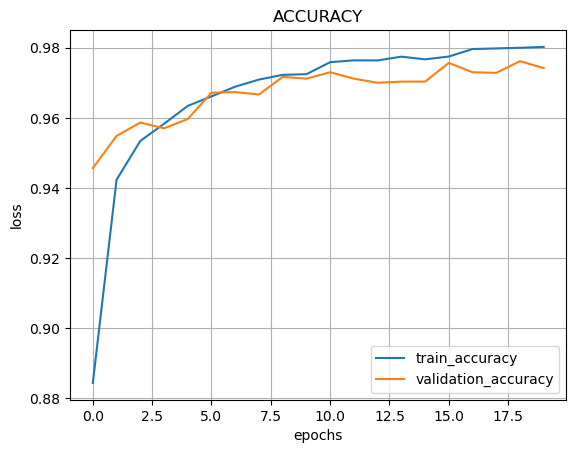

In [48]:
plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best")

In [49]:
## 도현이 버전

(X_train, y_train), (X_test, y_test) = mnist.load_data()

##### one hot encoding

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)



##### 차원변경

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)


##### 정규화
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


##### Vaild
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1)

# print(X_train.shape, X_val.shape)



s = np.arange(len(X_train)) 
print(s)
np.random.shuffle(s)
print(s)

X_train = X_train[s]
y_train = y_train[s]

# 수동으로 하면 반복시 변화 없다.
X_val = X_train[:10000]
X_train = X_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

model = Sequential()
model.add(Flatten(input_shape=(28**2, )))

model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer=Adam(learning_rate=0.001),
             metrics=["accuracy"])

model.summary()

# # 대시보드로확인 tensorboard
# tf_hist = tf.keras.callbacks.TensorBoard(log_dir="./graph") # 디폴트 저장폴더 logs   , write_images=True
# # 특정 상황에서 시스템에 의해 호출

## Early stoppiing
tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# ## ModelCheckpoint
# tf_chk = tf.keras.callbacks.ModelCheckpoint("/data/modelchk_test.h5",
#                                            monitor='val_loss',
#                                            save_best_only=True)

# ## ReductLROmPlateau
# tf_reduce = tf.keras.callbacks.ReduceLROnPlateau(factor=.5, patience=5) # stop대신 넣음. 14-15 등등 변화 적으니 러닝레이트 절반.



#### 학습
result = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                   validation_data=(X_val, y_val), callbacks=[tf_stop])

### 3) 평가 

model.evaluate(X_test, y_test, batch_size=32)

[    0     1     2 ... 59997 59998 59999]
[56250 31518 15974 ... 41658 57437 23438]
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 256)               200960    
                                                                 
 dense_39 (Dense)            (None, 256)               65792     
                                                                 
 dense_40 (Dense)            (None, 256)               65792     
                                                                 
 dense_41 (Dense)            (None, 256)               65792     
                                                                 
 dense_42 (Dense)            (None, 256)               65792     
                                   

[0.22762463986873627, 0.972100019454956]

# 실습2 : Fashion MNIST

### (1) Data definition

In [50]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [51]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [52]:
import tensorflow.keras.utils as utils

## (2) 데이터 소개

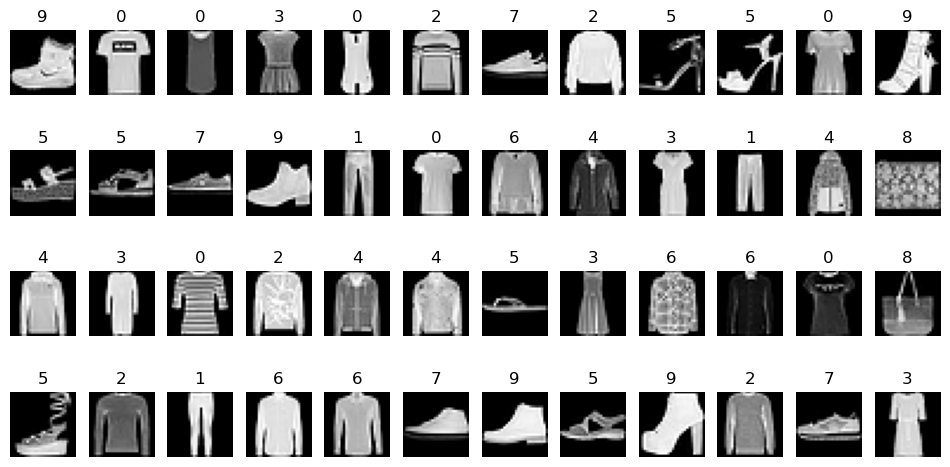

In [53]:
plt.figure(figsize=(12,6))

for idx in range(48):
    plt.subplot(4, 12, idx+1)
    plt.imshow(X_train[idx], cmap="gray") # 흑백으로 보기 : cmap="gray"
    plt.axis("off") # 눈금 없애기
    plt.title(y_train[idx])

In [54]:
"""
1. 기본 세팅값으로 점수와 그래프 확인

2. 정규화와 원핫 인코딩(sparse_categorical, categorical)

3. hidden layer와 노드수 추가

4. validation(validate_data, validation_split)

5. learning rate
    - 기본값
    - 0.1
6. optimizer
    - Adam(LR 기본값, 0.1)
    - SGD(LR 기본값, 0.1)

7. Tensorboard를 이용한 그래프 확인

8. callback함수 사용

9. 가중치 초기화, Dropout 사용했을 때 전후 성능비교

"""

'\n1. 기본 세팅값으로 점수와 그래프 확인\n\n2. 정규화와 원핫 인코딩(sparse_categorical, categorical)\n\n3. hidden layer와 노드수 추가\n\n4. validation(validate_data, validation_split)\n\n5. learning rate\n    - 기본값\n    - 0.1\n6. optimizer\n    - Adam(LR 기본값, 0.1)\n    - SGD(LR 기본값, 0.1)\n\n7. Tensorboard를 이용한 그래프 확인\n\n8. callback함수 사용\n\n9. 가중치 초기화, Dropout 사용했을 때 전후 성능비교\n\n'

In [55]:
##### one-hot encoding

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [56]:
### 차원 변경

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 784)

In [57]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


In [61]:
model = Sequential()


##### 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model.add(Flatten(input_shape=(28*28,))) # 여기 입력 할 때는 1차원으로 통과될 수 있도록
# model.add(Flatten(input_shape=(28**2,)))
# model.add(Flatten(input_shape=(784,)))
# model.add(Flatten(input_shape=(X.shape[1]**2,)))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax")) 

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate = 0.001), metrics=["accuracy"])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_57 (Dense)            (None, 128)               100480    
                                                                 
 dense_58 (Dense)            (None, 128)               16512     
                                                                 
 dense_59 (Dense)            (None, 128)               16512     
                                                                 
 dense_60 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [62]:
#### 학습
result = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4402 - accuracy: 0.8388
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3333 - accuracy: 0.8781
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2965 - accuracy: 0.8896
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2723 - accuracy: 0.8972
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2505 - accuracy: 0.9057
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2341 - accuracy: 0.9122
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2217 - accuracy: 0.9166
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2058 - accuracy: 0.9225
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1929 - accuracy: 0.9262
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.188

In [63]:
#### 평가
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 0s 1ms/step - loss: 0.4981 - accuracy: 0.8823


[0.49814921617507935, 0.8823000192642212]

In [64]:
# 기본 loss: 96.3764 - accuracy: 0.8133

# 2 정규성 loss: 1.5450 - accuracy: 0.7759

# 3 히든레이어 3개(노드64개) 추가 loss: 0.7952 - accuracy: 0.7175
# 3 히든레이어 3개(노드128개) 추가 loss: 1.2812 - accuracy: 0.4475

## (3) Data Shuffling
- 이미 나누어져 있는 데이터이기에, 나누는 것은 생략하고 섞는 것만 필요함

In [75]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

s = np.arange(len(X_train))
print(s)

np.random.shuffle(s)
print(s)

# 랜덤으로 섞은 인덱스를 기준으로 정렬하면 섞은 효과

# 훈련 데이터를 섞어주면 정답 데이터도 섞어줘야한다,
X_train = X_train[s]
y_train = y_train[s]

# test 데이터는 섞을 필요가 없다. # 학습시킬 것이 아니기 때문에

[    0     1     2 ... 59997 59998 59999]
[50907 22662 33610 ... 36945 54482 51035]


In [76]:
# 6만개 중에 15%인 9000개만 빼내자
# 51000개는 훈련 데이터
# 9000개는 검증데이터

VAL_SPLIT_RATIO = 0.15

val_nums = int(VAL_SPLIT_RATIO * len(X_train))
print("val_nums :", val_nums)

# validation용 데이터 분할
X_val = X_train[:val_nums]
y_val = y_train[:val_nums]

# 훈련용 데이터
X_train = X_train[val_nums:]
y_train = y_train[val_nums:]


print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

val_nums : 9000
(51000, 28, 28) (51000,)
(9000, 28, 28) (9000,)


## (4) 정규화

In [77]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

print(X_train[0].max(), X_train[0].min())
print(X_test[0].max(), X_test[0].min())
print(X_val[0].max(), X_val[0].min())

1.0 0.0
1.0 0.0
1.0 0.0


## (5) one-hot encoding

In [78]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
y_val = utils.to_categorical(y_val, 10)

print(y_train[0], np.argmax(y_train[0]))
print(y_test[0], np.argmax(y_test[0]))
print(y_val[0], np.argmax(y_val[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1


## (6) 모델 구축

In [81]:
model = Sequential()

# input_shape=(28, 28, 1) 1 -> 하나의 이미지에 대한 정보, 흑백인지 컬러인지
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

# sgd의 기본값 = 0.01
# Adam = 0.001
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_69 (Dense)            (None, 64)                50240     
                                                                 
 dense_70 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [82]:
from datetime import datetime

start = datetime.now()

result = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

end = datetime.now()

print("걸린 시간:", end-start)

Epoch 1/30
1594/1594 [==============================] - 3s 2ms/step - loss: 0.5368 - accuracy: 0.8126 - val_loss: 0.4726 - val_accuracy: 0.8362
Epoch 2/30
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4064 - accuracy: 0.8551 - val_loss: 0.4065 - val_accuracy: 0.8571
Epoch 3/30
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3677 - accuracy: 0.8677 - val_loss: 0.3636 - val_accuracy: 0.8677
Epoch 4/30
1594/1594 [==============================] - 2s 2ms/step - loss: 0.3424 - accuracy: 0.8764 - val_loss: 0.3509 - val_accuracy: 0.8740
Epoch 5/30
1594/1594 [==============================] - 2s 2ms/step - loss: 0.3242 - accuracy: 0.8813 - val_loss: 0.3474 - val_accuracy: 0.8734
Epoch 6/30
1594/1594 [==============================] - 2s 2ms/step - loss: 0.3081 - accuracy: 0.8865 - val_loss: 0.3328 - val_accuracy: 0.8826
Epoch 7/30
1594/1594 [==============================] - 2s 2ms/step - loss: 0.2967 - accuracy: 0.8923 - val_loss: 0.3199 - val_accuracy:

## (7) 평가 및 시각화

In [83]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3814 - accuracy: 0.8826


[0.38144004344940186, 0.8826000094413757]

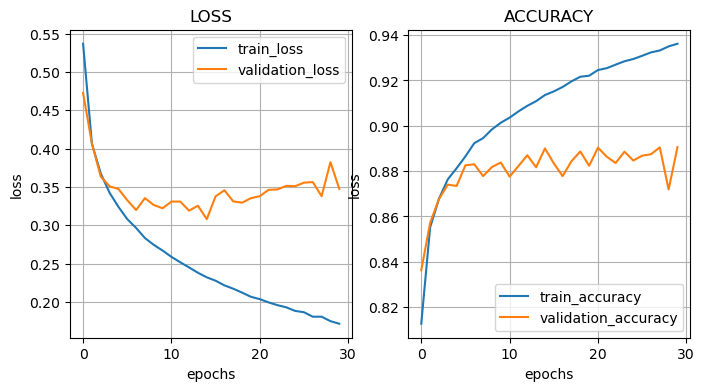

In [84]:
# Adam(), lr=0.001
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

plt.subplot(1,2,2)

plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

## (8) Adam(), lr=0.1

In [85]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# shuffle
s = np.arange(len(X_train))

print(s)

np.random.shuffle(s)
print(s)

X_train = X_train[s]
y_train = y_train[s]

VAL_SPLIT_RATIO = 0.15

val_nums = int(VAL_SPLIT_RATIO * len(X_train))

print("val_nums :", val_nums)

X_val = X_train[:val_nums]
y_val = y_train[:val_nums]

X_train = X_train[val_nums:]
y_train = y_train[val_nums:]


print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

## (4) 정규화

X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

print(X_train[0].max(), X_train[0].min())
print(X_test[0].max(), X_test[0].min())
print(X_val[0].max(), X_val[0].min())

## (5) one-hot encoding

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
y_val = utils.to_categorical(y_val, 10)

print(y_train[0], np.argmax(y_train[0]))
print(y_test[0], np.argmax(y_test[0]))

## (6) 모델 구축

model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.1), metrics=["accuracy"])
model.summary()

from datetime import datetime

start = datetime.now()

result = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

end = datetime.now()

print("걸린 시간:", end-start)

## (7) 평가 및 시각화

model.evaluate(X_test, y_test)

[    0     1     2 ... 59997 59998 59999]
[ 1721 32891  7118 ... 15821 26728 57471]
val_nums : 9000
(51000, 28, 28) (51000,)
(9000, 28, 28) (9000,)
1.0 0.0
1.0 0.0
1.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_71 (Dense)            (None, 50)                39250     
                                                                 
 dense_72 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1594/1594 [==============================] - 3s 2ms/step - los

[2.3928980827331543, 0.2515999972820282]

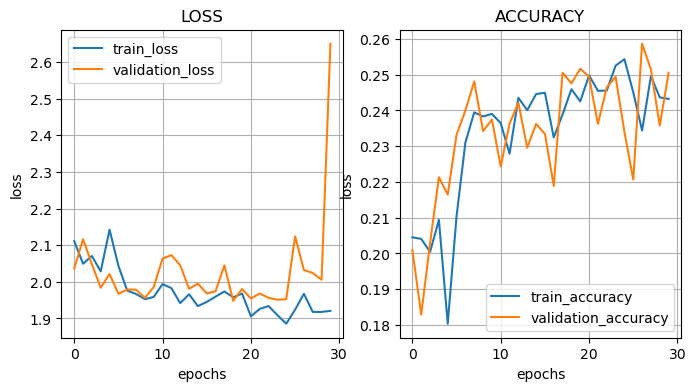

In [86]:
# Adam(), lr=0.1
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

plt.subplot(1,2,2)

plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

## (9) SGD, lr=0.01

In [88]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# shuffle
s = np.arange(len(X_train))

print(s)

np.random.shuffle(s)
print(s)

X_train = X_train[s]
y_train = y_train[s]

VAL_SPLIT_RATIO = 0.15

val_nums = int(VAL_SPLIT_RATIO * len(X_train))

print("val_nums :", val_nums)

X_val = X_train[:val_nums]
y_val = y_train[:val_nums]

X_train = X_train[val_nums:]
y_train = y_train[val_nums:]


print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

## (4) 정규화

X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

print(X_train[0].max(), X_train[0].min())
print(X_test[0].max(), X_test[0].min())
print(X_val[0].max(), X_val[0].min())

## (5) one-hot encoding

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
y_val = utils.to_categorical(y_val, 10)

print(y_train[0], np.argmax(y_train[0]))
print(y_test[0], np.argmax(y_test[0]))

## (6) 모델 구축

model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
model.summary()

from datetime import datetime

start = datetime.now()

result = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

end = datetime.now()

print("걸린 시간:", end-start)

## (7) 평가 및 시각화

model.evaluate(X_test, y_test)

[    0     1     2 ... 59997 59998 59999]
[10027 49891 50766 ... 44257 18978 20114]
val_nums : 9000
(51000, 28, 28) (51000,)
(9000, 28, 28) (9000,)
1.0 0.0
1.0 0.0
1.0 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_75 (Dense)            (None, 64)                50240     
                                                                 
 dense_76 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1594/1594 [==============================] - 3s 2ms/step - los

[0.3747350871562958, 0.8668000102043152]

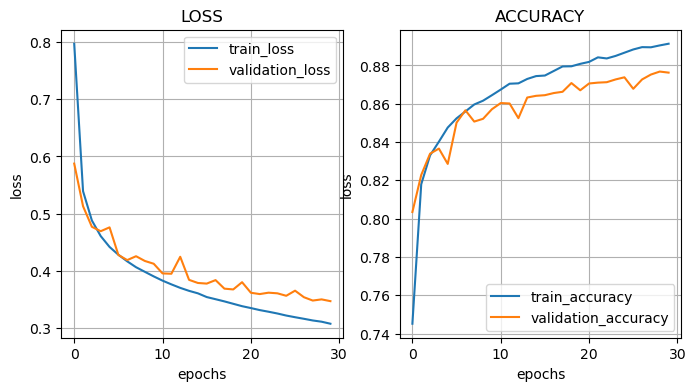

In [89]:
# SGD(), lr=0.01
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

plt.subplot(1,2,2)

plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

## (10) SGD(), lr=0.1

In [90]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# shuffle
s = np.arange(len(X_train))

print(s)

np.random.shuffle(s)
print(s)

X_train = X_train[s]
y_train = y_train[s]

VAL_SPLIT_RATIO = 0.15

val_nums = int(VAL_SPLIT_RATIO * len(X_train))

print("val_nums :", val_nums)

X_val = X_train[:val_nums]
y_val = y_train[:val_nums]

X_train = X_train[val_nums:]
y_train = y_train[val_nums:]


print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

## (4) 정규화

X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

print(X_train[0].max(), X_train[0].min())
print(X_test[0].max(), X_test[0].min())
print(X_val[0].max(), X_val[0].min())

## (5) one-hot encoding

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
y_val = utils.to_categorical(y_val, 10)

print(y_train[0], np.argmax(y_train[0]))
print(y_test[0], np.argmax(y_test[0]))

## (6) 모델 구축

model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.1), metrics=["accuracy"])
model.summary()

from datetime import datetime

start = datetime.now()

result = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

end = datetime.now()

print("걸린 시간:", end-start)

## (7) 평가 및 시각화

model.evaluate(X_test, y_test)

[    0     1     2 ... 59997 59998 59999]
[19046 14529 25462 ... 35535 53025 28466]
val_nums : 9000
(51000, 28, 28) (51000,)
(9000, 28, 28) (9000,)
1.0 0.0
1.0 0.0
1.0 0.0
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_77 (Dense)            (None, 64)                50240     
                                                                 
 dense_78 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1594/1594 [==============================] - 3s 2ms/step - los

[0.39077165722846985, 0.8766000270843506]

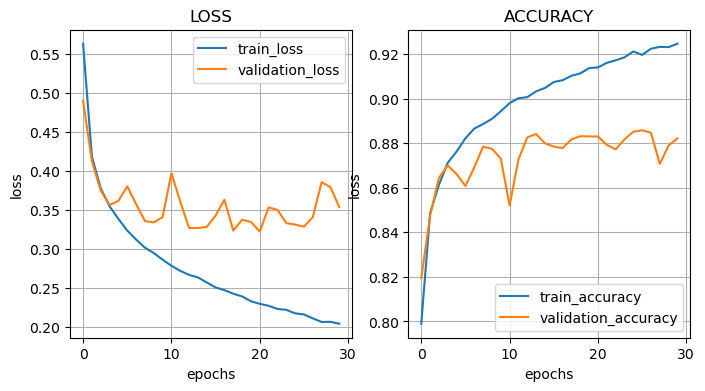

In [91]:
# SGD(), lr=0.1
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

plt.subplot(1,2,2)

plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

In [92]:
# 오차가 높다고 해서, 정확도가 떨어져야 하는 것은 아님. 정확도는 맞은 것에 대한 평균이기 때문 
# 즉 오차의 계산 방법과 정확도의 계산 방법이 다르기 때문에 오차가 높아도, 정확도가 높을 수 있음.
"""
epoch1
정답 : 0 3 0 2
예측 : 0 5 0 3


epoch2
정답 : 0 3 0 2
예측 : 0 9 0 8
- 오차는 커졌으나 정확도는 같은 50%


"""

'\nepoch1\n정답 : 0 3 0 2\n예측 : 0 5 0 3\n\n\nepoch2\n정답 : 0 3 0 2\n예측 : 0 9 0 8\n- 오차는 커졌으나 정확도는 같은 50%\n\n\n'

## (11) tf.keras.layers.BatchNormalization

(51000, 28, 28) (51000,)
(9000, 28, 28) (9000,)
1.0 0.0
1.0 0.0
1.0 0.0
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_82 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_83 (Dense)            (None, 10)                650       
                                                                 
Total params: 51,146
Trainable params: 51,018
Non-trainable params: 128
_______________________________________

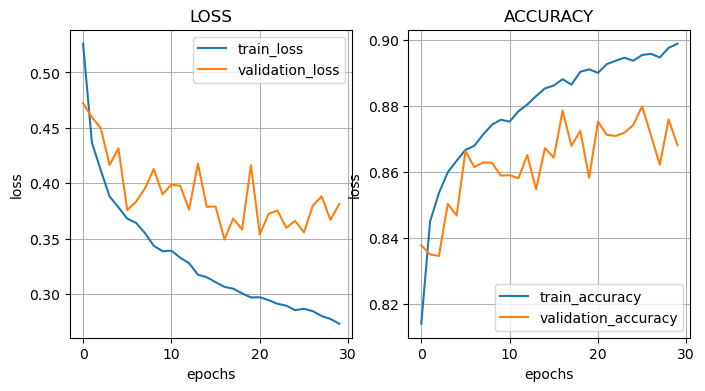

In [95]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# shuffle
s = np.arange(len(X_train))
np.random.shuffle(s)

X_train = X_train[s]
y_train = y_train[s]

# validation용 데이터 생성 및 분할 
VAL_SPLIT_RATIO = 0.15
val_nums = int(VAL_SPLIT_RATIO * len(X_train))

X_val = X_train[:val_nums]
y_val = y_train[:val_nums]

X_train = X_train[val_nums:]
y_train = y_train[val_nums:]


print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

## (4) 정규화

X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

print(X_train[0].max(), X_train[0].min())
print(X_test[0].max(), X_test[0].min())
print(X_val[0].max(), X_val[0].min())

## (5) one-hot encoding

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
y_val = utils.to_categorical(y_val, 10)

print(y_train[0], np.argmax(y_train[0]))
print(y_test[0], np.argmax(y_test[0]))

## (6) 모델 구축

model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(64, activation="relu"))

from tensorflow.keras.layers import BatchNormalization
## tf.keras.layers.BatchNormalization()
model.add(BatchNormalization())
# BatchNormalization은 TensorFlow의 Keras API에서 제공하는 층(layer)으로
# 입력 데이터에 대해 배치 정규화(batch normalization)를 수행합니다.
# 배치 정규화는 딥러닝 모델에서 훈련 안정성과 성능을 개선하기 위해 일반적으로 사용되는 기법

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.1), metrics=["accuracy"])
model.summary()

from datetime import datetime

start = datetime.now()

result = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

end = datetime.now()

print("걸린 시간:", end-start)

## (7) 평가

model.evaluate(X_test, y_test)

# SGD(), lr=0.1, BatchNormalization()
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

plt.subplot(1,2,2)

plt.title("ACCURACY")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="validation_accuracy")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정